In [0]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram
%matplotlib inline

In [0]:
IBMQ.save_account("Your Token Here",overwrite=True) # Replace "Your Token Here" to your token

In [0]:
provider=IBMQ.load_account()

# Circuit definition
Fourier tranformation
\begin{equation}
\frac{1}{\sqrt{32}}\sum_{i=0}^{31}|x_i\rangle \to |00000\rangle
\end{equation}

In [0]:
nqubit=5

q=QuantumRegister(nqubit)
c=ClassicalRegister(nqubit)
circuit=QuantumCircuit(q,c)


# state preparation
for i in range(nqubit):
    circuit.h(q[i])

    
# Fourier transformation
for i in range(nqubit-1):
    circuit.h(q[i])
    for k in range(nqubit-i-1):
        circuit.cu1(2*np.pi/2**(k+2),q[i+k+1],q[i])
    circuit.barrier([q[i] for i in range(nqubit)])
circuit.h(q[nqubit-1])
circuit.barrier([q[i] for i in range(nqubit)])

for i in range(nqubit//2):
    circuit.swap(q[i],q[nqubit-i-1])
circuit.barrier([q[i] for i in range(nqubit)])

for i in range(nqubit):
    circuit.measure(q[i],c[i])
    
circuit.draw()

┌───┐┌───┐                              ░                            ░ »
q0_0: ┤ H ├┤ H ├─■──────■──────■──────■───────░────────────────────────────░─»
      ├───┤└───┘ │pi/2  │      │      │       ░ ┌───┐                      ░ »
q0_1: ┤ H ├──────■──────┼──────┼──────┼───────░─┤ H ├─■──────■──────■──────░─»
      ├───┤             │pi/4  │      │       ░ └───┘ │pi/2  │      │      ░ »
q0_2: ┤ H ├─────────────■──────┼──────┼───────░───────■──────┼──────┼──────░─»
      ├───┤                    │pi/8  │       ░              │pi/4  │      ░ »
q0_3: ┤ H ├────────────────────■──────┼───────░──────────────■──────┼──────░─»
      ├───┤                           │pi/16  ░                     │pi/8  ░ »
q0_4: ┤ H ├───────────────────────────■───────░─────────────────────■──────░─»
      └───┘                                   ░                            ░ »
c0_0: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
c0_1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
c0_2: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
c0_3: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
c0_4: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«                          ░              ░       ░        ░ ┌─┐            
«q0_0: ────────────────────░──────────────░───────░──X─────░─┤M├────────────
«                          ░              ░       ░  │     ░ └╥┘┌─┐         
«q0_1: ────────────────────░──────────────░───────░──┼──X──░──╫─┤M├─────────
«      ┌───┐               ░              ░       ░  │  │  ░  ║ └╥┘┌─┐      
«q0_2: ┤ H ├─■──────■──────░──────────────░───────░──┼──┼──░──╫──╫─┤M├──────
«      └───┘ │pi/2  │      ░ ┌───┐        ░       ░  │  │  ░  ║  ║ └╥┘┌─┐   
«q0_3: ──────■──────┼──────░─┤ H ├─■──────░───────░──┼──X──░──╫──╫──╫─┤M├───
«                   │pi/4  ░ └───┘ │pi/2  ░ ┌───┐ ░  │     ░  ║  ║  ║ └╥┘┌─┐
«q0_4: ─────────────■──────░───────■──────░─┤ H ├─░──X─────░──╫──╫──╫──╫─┤M├
«                          ░              ░ └───┘ ░        ░  ║  ║  ║  ║ └╥┘
«c0_0: ═══════════════════════════════════════════════════════╩══╬══╬══╬══╬═
«                                                                ║  ║  ║  ║ 
«c0_1: ══════════════════════════════════════════════════════════╩══╬══╬══╬═
«                                                                   ║  ║  ║ 
«c0_2: ═════════════════════════════════════════════════════════════╩══╬══╬═
«                                                                      ║  ║ 
«c0_3: ════════════════════════════════════════════════════════════════╩══╬═
«                                                                         ║ 
«c0_4: ═══════════════════════════════════════════════════════════════════╩═
«

# run with a simulator

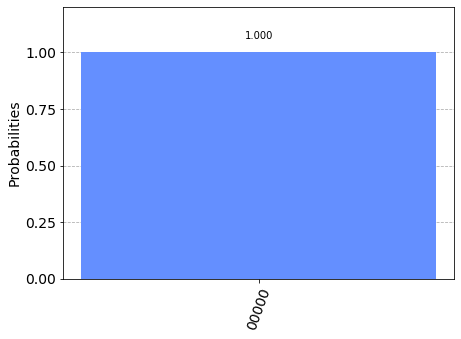

In [0]:
backend=Aer.get_backend("qasm_simulator")
job=execute(circuit,backend,shots=8192)
result=job.result()
counts=result.get_counts(circuit)
plot_histogram(counts)

# run with a quantum computer

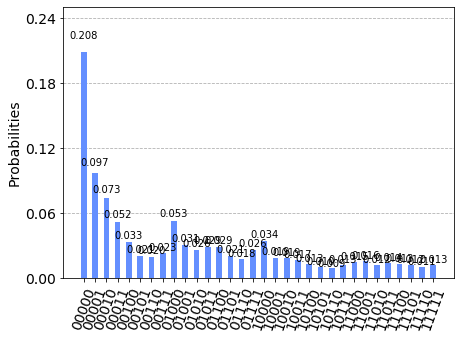

In [0]:
backend=provider.get_backend("ibmq_ourense")
job=execute(circuit,backend,shots=8192)
result=job.result()
counts=result.get_counts(circuit)
plot_histogram(counts)